# Initialization

In [3]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [4]:
from PIL import Image
from matplotlib import pyplot
from os.path import basename
from os.path import splitext
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn import preprocessing

In [5]:
data_path = r"C:\\Users\SMSK_Narinda\Desktop\Research\dataset"
test_folder =  r"C:\\Users\SMSK_Narinda\Desktop\Research\dataset\test"
train_folder =  r'C:\\Users\SMSK_Narinda\Desktop\Research\dataset\train'

img_size = 200
num_classes = 23
EPOCHS = 20
BATCH_SIZE = 64

In [6]:
label = os.listdir(data_path)
print(label)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


# Contoh BGR, HSV extraction

In [7]:
def tampilkan_histogram(r, g, b, gambar):
    intensitas = list(range(256))
    lebar_bar = 0.3

    # https://stackoverflow.com/q/9304408/9157799
    intensitas = [i-lebar_bar for i in intensitas]
    # https://stackoverflow.com/q/14270391/9157799
    pyplot.bar(intensitas, r, width=lebar_bar, color='r')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, g, width=lebar_bar, color='g')

    intensitas = [i+lebar_bar for i in intensitas]
    pyplot.bar(intensitas, b, width=lebar_bar, color='b')

    pyplot.title('Histogram ' + gambar)
    pyplot.xlabel('Intensitas')
    pyplot.ylabel('Kemunculan')
    pyplot.legend(['R', 'G', 'B'])
    pyplot.show()

In [8]:
def get_file_name(file_path):
    # https://stackoverflow.com/a/678266/9157799
    return splitext(basename(file_path))[0]

In [9]:
def histogram(gambar):
    GAMBAR = Image.open(gambar)
    PIXEL = GAMBAR.load()

    ukuran_horizontal = GAMBAR.size[0]
    ukuran_vertikal = GAMBAR.size[1]

    gambar_r = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_r = gambar_r.load()

    gambar_g = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_g = gambar_g.load()

    gambar_b = Image.new('RGB', (ukuran_horizontal, ukuran_vertikal))
    pixel_b = gambar_b.load()

    # https://stackoverflow.com/q/10712002/9157799
    r = [0] * 256
    g = [0] * 256
    b = [0] * 256

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            intensitas_r = PIXEL[x, y][0]
            intensitas_g = PIXEL[x, y][1]
            intensitas_b = PIXEL[x, y][2]
            r[intensitas_r] += 1
            g[intensitas_g] += 1
            b[intensitas_b] += 1
            pixel_r[x, y] = (intensitas_r, 0, 0)
            pixel_g[x, y] = (0, intensitas_g, 0)
            pixel_b[x, y] = (0, 0, intensitas_b)

    gambar_r.save(get_file_name(gambar) + '_r.jpg')
    gambar_g.save(get_file_name(gambar) + '_g.jpg')
    gambar_b.save(get_file_name(gambar) + '_b.jpg')

    tampilkan_histogram(r, g, b, gambar)


In [ ]:
def histogram(gambar_path):
    # Baca gambar dan konversi dari BGR ke HSV menggunakan OpenCV
    img = cv2.imread(gambar_path)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
    # Pisahkan komponen H, S, dan V
    h, s, v = cv2.split(img_hsv)
    
    # Hitung histogram untuk setiap komponen
    hist_h = cv2.calcHist([h], [0], None, [256], [0, 256])
    hist_s = cv2.calcHist([s], [0], None, [256], [0, 256])
    hist_v = cv2.calcHist([v], [0], None, [256], [0, 256])
    
    # Plot histogram
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.plot(hist_h, color='r')
    plt.title('Histogram Hue')
    
    plt.subplot(1, 3, 2)
    plt.plot(hist_s, color='g')
    plt.title('Histogram Saturation')
    
    plt.subplot(1, 3, 3)
    plt.plot(hist_v, color='b')
    plt.title('Histogram Value')
    
    plt.tight_layout()
    plt.show()

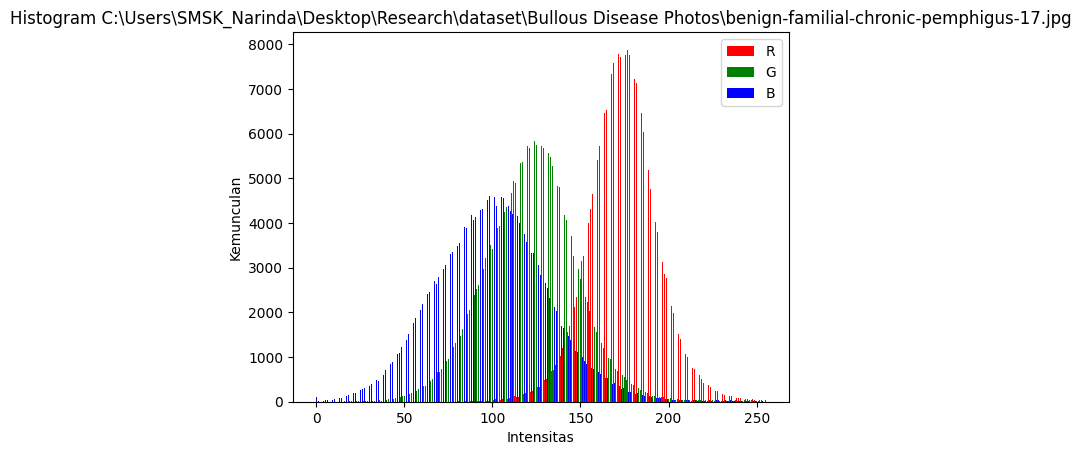

In [10]:
sample = r"C:\Users\SMSK_Narinda\Desktop\Research\dataset\Bullous Disease Photos\benign-familial-chronic-pemphigus-17.jpg"
histogram(sample)

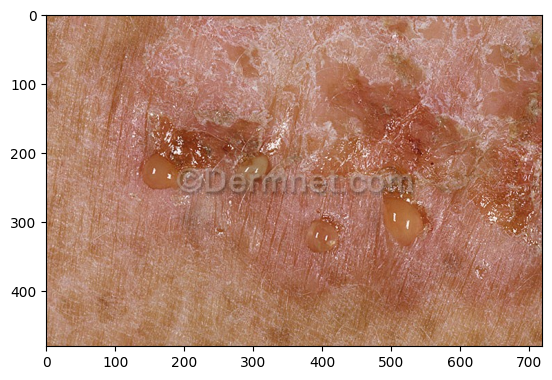

In [16]:
img = cv2.imread(sample)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

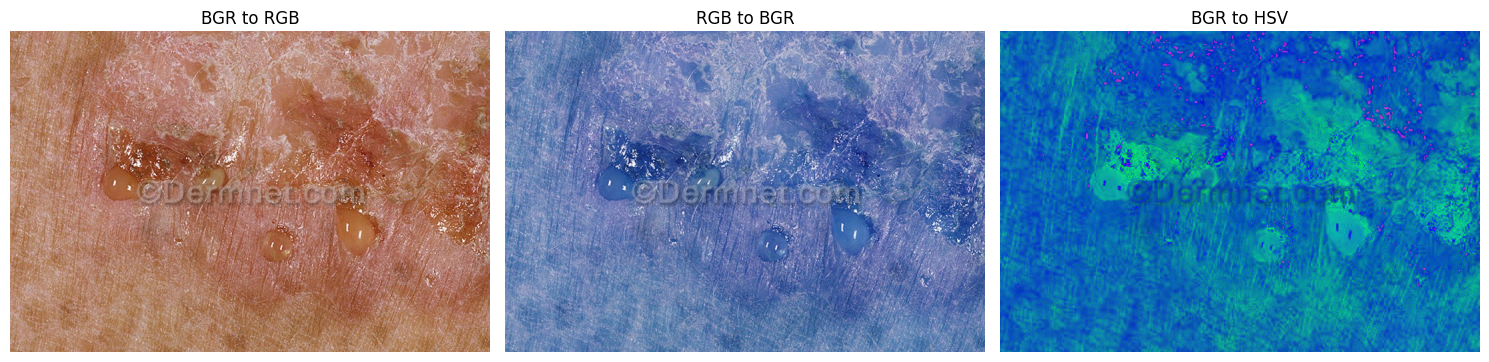

In [27]:
# Define the image paths
image_paths = [
    r"C:\Users\SMSK_Narinda\Desktop\Research\dataset\Bullous Disease Photos\benign-familial-chronic-pemphigus-17.jpg",
    r"C:\Users\SMSK_Narinda\Desktop\Research\dataset\Bullous Disease Photos\benign-familial-chronic-pemphigus-17.jpg",
    r"C:\Users\SMSK_Narinda\Desktop\Research\dataset\Bullous Disease Photos\benign-familial-chronic-pemphigus-17.jpg"
]

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Process and display each image with the specified color conversion
for j, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    if j == 0:
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes[j].imshow(img)
        axes[j].set_title("BGR to RGB")
    elif j == 1:
        # Convert RGB to BGR (Original image is in BGR, so convert to RGB first)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        axes[j].imshow(img)
        axes[j].set_title("RGB to BGR")
    elif j == 2:
        # Convert BGR to HSV
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        axes[j].imshow(img)
        axes[j].set_title("BGR to HSV")
    
    axes[j].axis('off')  # Hide the axis

plt.tight_layout()
plt.show()

In [25]:
output_path = r"C:\Users\SMSK_Narinda\Desktop\Result_HSV.png"
plt.tight_layout()

# Save the figure
output_path = r"C:\Users\SMSK_Narinda\Desktop\Research\dataset\output\combined_images.png"
plt.savefig(output_path)

plt.show()

plt.savefig(output_path)

<Figure size 640x480 with 0 Axes>

# Image to Array

In [5]:
def get_images(dir):
  Images = []
  Labels = []

  for label in os.listdir(dir):
    label_path = os.path.join(dir, label)
    for image_file in os.listdir(label_path):
      image = cv2.imread(os.path.join(label_path, image_file))
      image = cv2.resize(image, (img_size, img_size))
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      Images.append(image)
      Labels.append(label)

  return shuffle(Images, Labels)


In [7]:
# def get_classlabel(class_code, dir):
#   label_names = os.listdir(dir)
#   return label_names[class_code]

Menampilkan jumlah dan ukuran gambar, serta jumlah labe

In [8]:
Images, Labels = get_images(data_path)
Images = np.array(Images)
Labels = np.array(Labels)

print ("ukuran gambar dan jumlah", Images.shape)
print("labels", Labels.shape)

ukuran gambar dan jumlah (19289, 200, 200, 3)
labels (19289,)


In [10]:
dataset_size = Images.shape[0]
data = Images.reshape(dataset_size,-1)

print(data.shape)
print(Labels.shape)
print(dataset_size)

(19289, 120000)
(19289,)
19289


# Raw Comparison

##Label Encoding
Data Visualization

---
example label encoding:

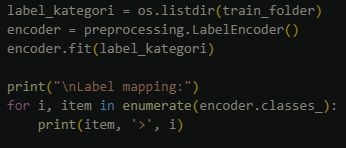


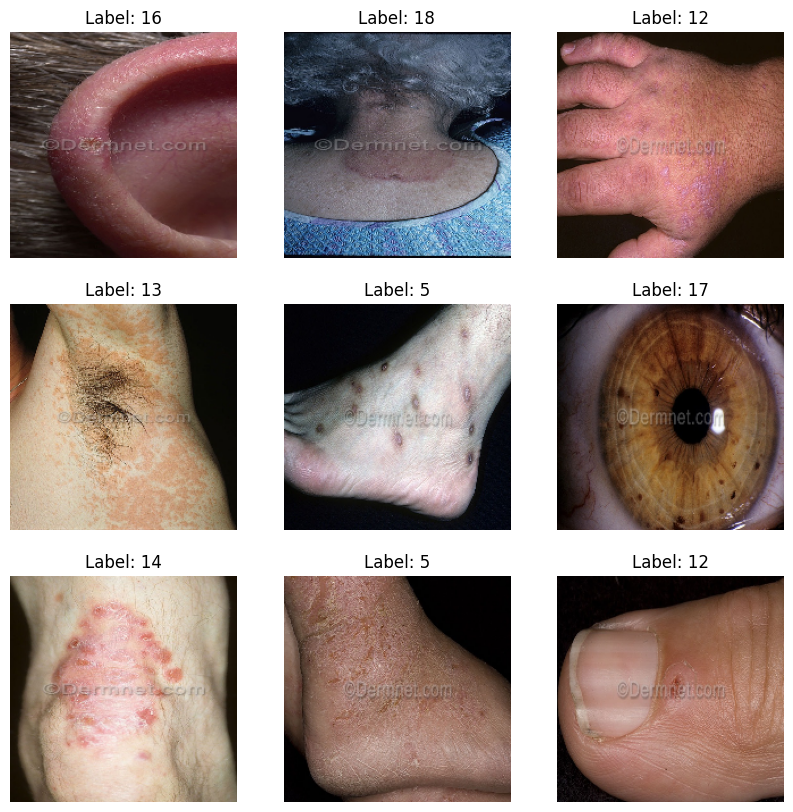

In [11]:
num_images_per_rows = 3
num_images_per_cols = 3

fig, axes = plt.subplots(num_images_per_rows, num_images_per_cols, figsize=(10, 10))

#Label Encoding
label_kategori = os.listdir(data_path)
encoder = preprocessing.LabelEncoder()
encoder.fit(label_kategori)

#Menampilkan gambar
for i in range(num_images_per_rows):
  for j in range(num_images_per_cols):
      image_index = i * num_images_per_cols + j
      # Menampilkan gambar pada subplot
      axes[i, j].imshow(Images[image_index,:,:,:])
      axes[i, j].axis('off')  # Jangan menampilkan sumbu
      # Menampilkan encoded label
      encoded_label = encoder.transform([Labels[image_index]])[0]
      # Menampilkan label asli
      # encoded_label = [Labels[image_index]]
      axes[i, j].set_title(f"Label: {encoded_label}")

plt.show()

# Identify Class Imbalance

source: https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b

Listing Directories: To better understand our dataset, we can list the directories (excluding files) within a specified path. By focusing only on directories, we can gather information about the unique categories or labels our images belong to. This step enables us to identify the distinct classes within our dataset, setting the stage for further analysis and visualization.

In [16]:
# Get a list of all files and directories in the path
contents = os.listdir(data_path)

# Loop through each item in the list
for item in contents:
    # Check if the item is a directory
    if os.path.isdir(os.path.join(train_folder, item)):
        print("Found directory:", item)

Counting Images in Directories: To gain insights into the distribution of images across different categories, we can count the number of image files within each subdirectory. We can identify and count the image files in each category by specifying image file extensions such as .png, .jpg, and .jpeg. This step provides valuable information about the distribution of images across different classes, allowing us to assess the balance or skewness of our dataset.

**Counting Images in Train Directories**

In [17]:
num_images = 0

# Iterate over each subdirectory
for dirpath, dirnames, filenames in os.walk(data_path):
    # Count the number of image files in the current subdirectory
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            num_images += 1

    # Print the number of image files in the current subdirectory
    print(f"Found {num_images} images in directory: {dirpath}")
    num_images = 0

Found 0 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset
Found 882 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Acne and Rosacea Photos
Found 1437 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
Found 612 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Atopic Dermatitis Photos
Found 561 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Bullous Disease Photos
Found 361 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Cellulitis Impetigo and other Bacterial Infections
Found 1544 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Eczema Photos
Found 505 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Exanthems and Drug Eruptions
Found 299 images in directory: C:\\Users\SMSK_Narinda\Desktop\Research\dataset\Hair Loss Photos Alopecia and other Hair Diseases
Found 

Visualizing the Distribution of Images: To visually represent images across categories, we can create a bar chart using matplotlib.pyplot. This chart displays the number of images in each subdirectory, making identifying any class imbalances or variations within our dataset easy. This visualization helps us understand the dataset’s structure and can guide decision-making in subsequent analysis.

**Visualizing the Distribution of Images in Train Directories**

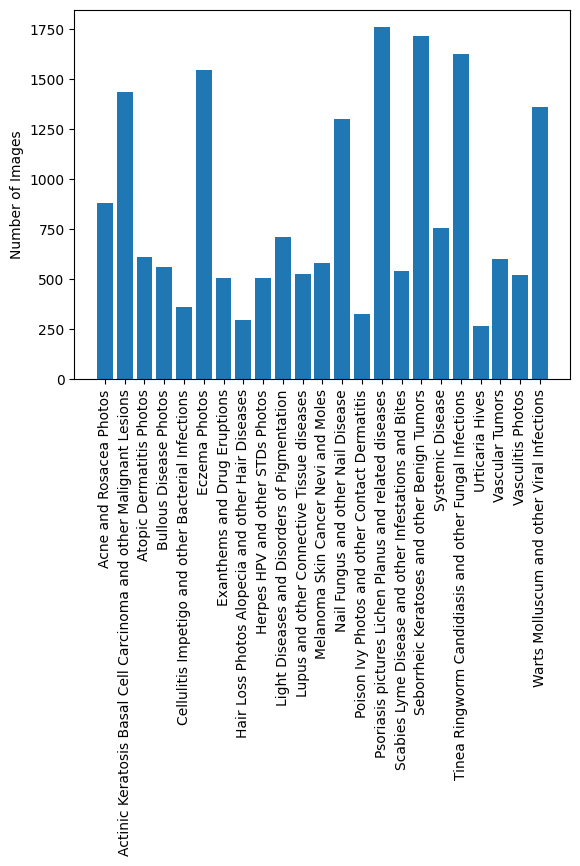

In [21]:
subdirectories = [os.path.join(data_path, d) for d in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, d))]

# Count the number of images in each subdirectory
counts = [0] * len(subdirectories)
for i, directory in enumerate(subdirectories):
    counts[i] = len(os.listdir(directory))

# Create a bar chart to visualize the distribution
plt.bar(label_kategori, counts)
plt.xticks(rotation=90)
plt.ylabel("Number of Images")
plt.show()

# Analyzing Image Properties

source: https://medium.com/@sehjadkhoja0/title-exploring-and-analyzing-image-data-with-python-79a7f72f4d2b

Analyzing Image Properties: To gain deeper insights into our image data, we can extract size, resolution, and colour distribution from the images within the subdirectories. This analysis provides valuable information about the characteristics of the images and helps us identify any patterns or anomalies within the dataset.

In [16]:
# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(train_folder):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

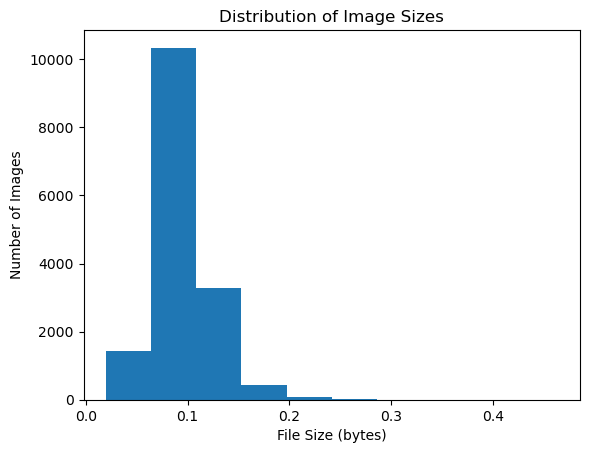

In [45]:
# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

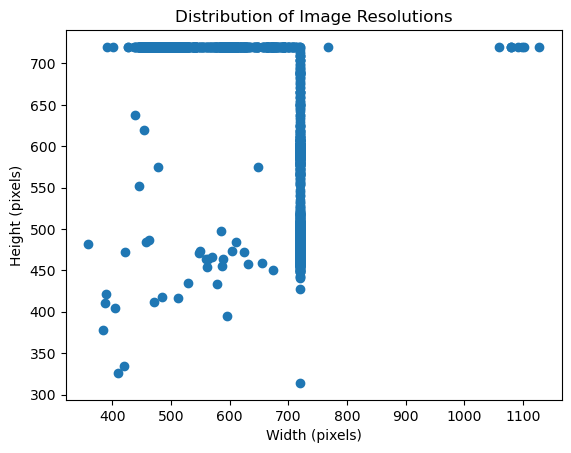

In [44]:
# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [38]:
# Create a scatter plot figure with plotly
fig = px.scatter(x=resolutions[:, 0], y=resolutions[:, 1], title="Distribution of Image Resolutions")

# Customize the plot
fig.update_layout(
    xaxis_title="Width (pixels)",
    yaxis_title="Height (pixels)",
    showlegend=False,
    hovermode="closest",
    width=800,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50, pad=4)
)

# Show the plot
fig.show()

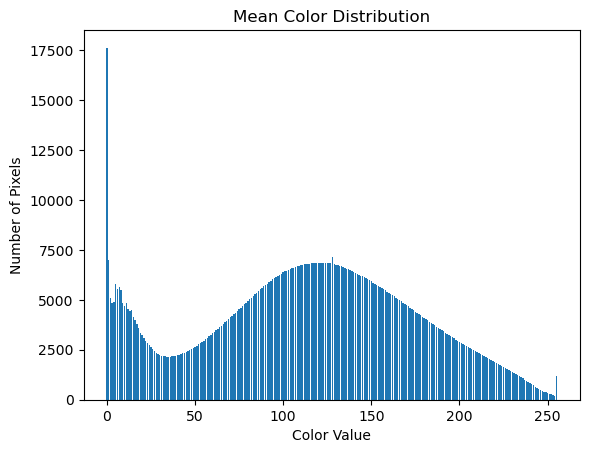

In [43]:
# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

# KNN

In [10]:
(trainX, testX, trainY, testY ) = train_test_split(data, lables, test_size= 0.25, random_state=42)

model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
model.fit(trainX, trainY)

print(classification_report(testY, model.predict(testX), target_names=le.classes_))

NameError: name 'train_test_split' is not defined